# Regression

> 📌  A process for modeling the **relationship** between variables of interest. 

Example: If you know the relationship between education and income (the more someone is educated, the more money they make), we could predict someone's income based on their education. 
_Simply speaking, learning such a_ **relationship** _is regression._


### What is the difference between correlation and regression?

**Question-A:** Consider the following data for 10 students who took exam last semester. Column-1 represents the student ID, Column-2 represents the attitude of the students before taking the exam, and Column-3 represents the score obtained in the exam.

|  STU-ID   |     Attitude    |     Score    |
|:---------:|:---------------:|:------------:|
|      1    |        65       |      129     |
|      2    |        67       |      126     |
|      3    |        68       |      143     |
|      4    |        70       |      156     |
|      5    |        71       |      161     |
|      6    |        72       |      158     |
|      7    |        72       |      168     |
|      8    |        73       |      166     |
|      9    |        73       |      182     |
|     10    |        75       |      201     |

1. Calculate the correlation between *Attitude* and *Score* using python.
2. If attitude decrease, then score will increase. True or False. Explain your answer based on Part-1.
3. If attitude of a new student is 74 units, then can you estimated his score before the exam using correlation?

In [2]:
# 1. Calculate the correlation between *Attitude* and *Score* using python.

import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


df = pd.read_csv('data/Regression-1.csv', delimiter =',')
corr = df.drop(['STU-ID'], axis=1).corr()
display(corr)
print(f"The correlation between Attitude and Score is {corr.loc['Attitude','Score']}")


,Attitude,Score
Attitude,1.00000,0.94179
Score,0.94179,1.00000


The correlation between Attitude and Score is 0.9417903723646914


2. If attitude decrease, then score will increase. True or False. Explain your answer based on Part-1.  
False, since the direction of relationship is positive.

3. If attitude of a new student is 74 units, then can you estimated his score before the exam using correlation?  
No, the correlation shows the strength and direction of the relationship. However, it cannot depict the actual relation.

## Regression vs Correlation

Correlation:
> 1. Correlation may indicate whether two variables are related or not.
> 2. However, correlation will not provide information of how one variable is related to another.

Regression:
> 1. Regression may identify how one or more variables are related to an output variable.
> 2. Specifically, it will provide details of how input variables affects the output variable.
> 3. Beyond estimating a relationship, regression is a way of **predicting** an output variable from one or more input variables.

# Linear Regression
> 📌 The most common form of regression used in data analysis.  
> 📌 It assumes the **relationship** of the input variables and the output variables is **linear** (can be expressed as a line or hyperplane).

## Linear Regression Overview

<img src="img/Reg_1.png" width=610 height=610 />

# Single Input Single Output (SISO) Linear regression
> 📌 How one input variable is related to one output variable?  

We will start with **Single Input Single Output (SISO)** linear regression.

**Notations**:
Let $x$ be the input variables, and let $y$ be the output variable. The linear regression model can be stated as:

**Model**:
$$
 y = \beta_0 + \beta_1 x,
$$

where $\beta_1$ represents the slope of the $x$, and $\beta_0$ is the intercept for the equation.

**Goal**:
Linear regression estimates the best values of $\beta_0$ and $\beta_1$. So, when a new or previously unobserved data point $x$ comes with unknown value of $y$, using the value of $x$, and estimated $\beta_0$ and $\beta_1$ values, one can find estimated value of $y$, say $\hat{y}$. The goal of linear regression is to have $\hat{y}$ as close as possible to $y$.


## Solution Method for SISO Linear Regression

From statistical analysis, it has been shown that the coefficients can be estimated as follows:

## $ \beta_1 = r \frac{sd_y}{sd_x} $ and <br>
## $ \beta_0 = \overline{y} - \beta_1 \overline{x} $

where $r$ is the Pearson's correlation coefficient, $sd_x$ and $sd_y$ represent the standard deviation of $x$ and $y$ variables respectively, $\overline{x}$ and $\overline{y}$ represent the means of $x$ and $y$ variables respectively.

### Example: SISO Linear Regression
**Question-B:** Consider the following data from __Question-A__:

|  STU-ID   |     Attitude    |     Score    |
|:---------:|:---------------:|:------------:|
|      1    |        65       |      129     |
|      2    |        67       |      126     |
|      3    |        68       |      143     |
|      4    |        70       |      156     |
|      5    |        71       |      161     |
|      6    |        72       |      158     |
|      7    |        72       |      168     |
|      8    |        73       |      166     |
|      9    |        73       |      182     |
|     10    |        75       |      201     |

1. Visualize the relationship between *Attitude* and *Score* (plot *Attitude* on x-axis, and *Score* on y-axis). 
2. Is the relationship linear, comment.  
3. Identify the linear relationship between *Attitude* and *Score* of the students using the formula. Then verify the result using python.
4. If a new participant with positive attitude of 78 is taking the exam, then what is the estimated score of the participant.
5. If new participants with positive attitude of 78, 74, 68 and 69 are taking the exam, then what are the estimated scores for the participants.
6. The estimated score and predicted score of student with attitude of 68 are different. Is there some error in the approach?

<Figure size 432x288 with 0 Axes>

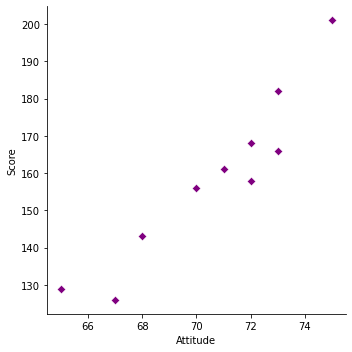

In [3]:
# 1. Visualize the relationship between Attitude and Score (plot Attitude on x-axis, and Score on y-axis).
%matplotlib inline
# %matplotlib notebook
# %matplotlib qt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Regression-1.csv', delimiter =',')
plt.figure()
sns.relplot(x='Attitude', y='Score',
            color = 'purple', marker = 'D',
            kind='scatter',
            data=df)
plt.xlabel('Attitude')
plt.ylabel('Score')
plt.show()

2: Is the relationship linear, comment.  
From the plot, it can be seen that the relationship could be linear.


3. Identify the linear relationship between *Attitude* and *Score* of the students using the formula. Then verify the result using python.

To identify the relationship, we need to identifying the betas

Using the formula:  

Pearson’s correlation coefficient r = 0.94. 
Mean of Attitude = 70.6, mean of Score = 159.  
S.D. of Attitude = 2.94, S.D. of Score = 21.64. 

Thus,  
$$\beta_1=0.94 \times \frac{21.64}{2.94}=6.93$$  
$$\beta_0=159−(6.93 \times  70.6)=−330.25$$  

In [4]:
# Then verify the result using python.
import numpy as np
from sklearn.linear_model import LinearRegression

# Create linear regression object
reg = LinearRegression(fit_intercept=True)

# Train the model using the training sets
reg.fit(df[['Attitude']], df['Score'])  #single column

# The betas are
print(f'Beta1, the slope is {np.round(reg.coef_,2)}; and Beta0, the intercept is {np.round(reg.intercept_,2)}')


Beta1, the slope is [6.93]; and Beta0, the intercept is -330.46


In [5]:
## The following code computes betas using the formula and python, 
## but without using the skliear library

import numpy as np

x=df['Attitude'].values
y=df['Score'].values

r = np.corrcoef(x, y)[0,1]

sdx = np.std(x)
sdy = np.std(y)
beta1 = r * (sdy / sdx)
beta0 = np.mean(y) - beta1*np.mean(x)
print("r = " , r)
print('Mean of X= ',np.mean(x))
print('Mean of Y = ',np.mean(y))
print( 'Std od X =',sdx)
print("Std of Y= " ,sdy)
print(f'Beta1, the slope is {np.round(beta1,2)}; and Beta0, the intercept is {np.round(beta0,2)}')


r =  0.9417903723646911
Mean of X=  70.6
Mean of Y =  159.0
Std od X = 2.939387691339814
Std of Y=  21.63792966066763
Beta1, the slope is 6.93; and Beta0, the intercept is -330.46


4. If a new participant with positive attitude of 78 is taking the exam, then what is the estimated score of the participant.  

From Part-3 we know:  
$$\beta_1=6.93$$  
$$\beta_0=-330.46$$ 
Thus, the new participant's estimated score will be  
$$\hat{y} =-330.46 + (6.93 \times 78) = 210.08$$

In [6]:
x_new = 59
y_new = reg.predict(np.array(x_new).reshape(1, -1)) #single value or single record 
print(f'The estimated score for the student with attiude of {x_new} is {np.round(y_new,2)}.')

The estimated score for the student with attiude of 59 is [78.58].


c:\Users\ebrah\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# 5. If new participants with positive attitude of 78,74,68 and 69 are taking the exam, 
# then what are the estimated scores for the participants.

x_new = [78,74,68,69]
y_new = reg.predict(np.array(x_new).reshape(-1, 1))  #single column
print(f'The estimated scores for the students with attiudes of {x_new} are {np.round(y_new,2).tolist()} respectively .')

The estimated scores for the students with attiudes of [78, 74, 68, 69] are [210.3, 182.57, 140.97, 147.91] respectively .


c:\Users\ebrah\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6. The estimated score and predicted score of student with attitude of 68 are different. Is there some error in the approach?  
From the plot, we can see that the relationship is not perfectly linear. Thus, the estimated values will not give the perfect results. There will be some error. The linear regression tries to minimize the mean squared error of the input data points. We will see all these details in the following slides.

### Example-2: SISO Linear Regression

**Question-C** Let us take an example to understand the gradient descent approach. Consider the data given in Regression-2.csv file. Do the following:  
1. Read and display the data.  
2. Plot the data  
3. Can we model the data using a linear relationship? If yes, then suggest the linear model, and highlight the unknowns.  

In [8]:
# 1. Read and display the data.  

import pandas as pd
df = pd.read_csv('data/Regression-2.csv', delimiter =',')
#print(df)
display(df.T)
# df.describe().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
x,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
y,3,4,8,4,6,9,8,12,15,26,35,40,45,54,49,59,60,62,63,68


<Figure size 432x288 with 0 Axes>

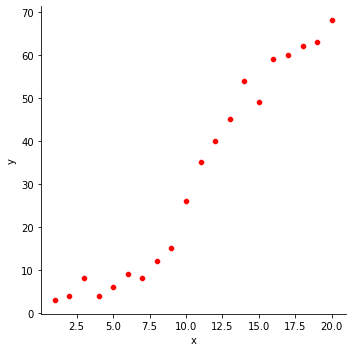

In [9]:
# 2. Plot the data
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('data/Regression-2.csv', delimiter =',')
plt.figure()
sns.relplot(x='x', y='y', color = 'r', marker = 'o',kind='scatter',data=df) # kind is either "line" or "scatter"
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3. Can we model the data using a linear relationship? If yes, then suggest the linear model, and highlight the unknowns.  

The data can be modeled using a linear relationship (more or less).  
let us denote the data as $x_i$, $y_i$, where $i=1, \ldots, n$, and $n$ is the total observations.   
Let us assume, the equation of the line (or the linear relation) is:  
$$ y= \beta_1x + \beta_0 $$
where $\beta_1$ is the line's slope and $\beta_0$ is the line's y-intercept are the two unknowns.  

#### How to find the value $\beta_1$ and $\beta_0$?

## What are the best values for $\beta_1$ and $\beta_0$?

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
reg.fit(df[['x']], df['y'])  #single column
# reg.fit(df['x'].values.reshape(-1,1), df['y'])  #single column

best_b1 =  reg.coef_[0]
best_b0 = reg.intercept_
print(f'The best values for b1 and b0 are {np.round(best_b1,2)} and {np.round(best_b0,2)} respectively.')

The best values for b1 and b0 are 3.98 and -10.26 respectively.


The values of $\beta_1$ and $\beta_0$ fall at the lowest point of the error function.

# Multiple Input Single Output (MISO) Linear Regression
> 📌 How multiple input variables are related to one output variable?  

- So far we have seen one input variable's relationship with one output variable. 
- In many practical applications, we will be dealing with multiple input variables.
- To incorporate multiple variables, consider the following notations:
 - Let the $n$ observations be represented by $(x^i,y_i)$, for $i=1,\ldots,n$  
 where $x^i$ is a vector in $\mathbb{R}^P$, and $P$ are the number of input variables.
 - Let $\beta_0$, the intercept
 - Let $\beta_j$ be the coefficients of variable $x^i_j$, for $j=1,\ldots,P$, and for $i=1,\ldots,n$ 
 - For ease of notation, we introduce $x^i_0 = 1$ for $i=1,\ldots,n$ 

Based on the notations, the linear relationship is defined as follows:
$$ h(x^i) = \sum_{j=0}^P \beta_j x^i_j \qquad \forall i=1,\ldots,n.$$
Moreover, the _error function_ can be defined as:
$$J(\boldsymbol \beta) = \frac{1}{n} \sum_{i=0}^n\left( h(x^i)-y_i \right)^2.$$

### Example MISO Linear Regression
**Question-D:** Consider the data given in the csv file titled "Regression-3.csv". 
1. Read and describe the data.
2. Calculate the correlation among all the variables.
3. Identify the top three correlated input variables to the output variable.
4. Calculate the coefficient estimates using OLS closed form.
5. Calculate the coefficient estimates using sci-kit learn LinearRegression module. 

In [11]:
# 1. Read and describe the data.
import numpy as np
import pandas as pd

df = pd.read_csv('data/Regression-3.csv', delimiter =',')
#display(df.head())
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
x1,97.0,1.030930e-11,1.005195,-2.300218,-0.713997,0.082650,0.662694,2.107397
x2,97.0,2.061865e-11,1.005195,-2.942386,-0.593769,-0.013927,0.580608,2.701661
x3,97.0,-2.061859e-11,1.005195,-3.087227,-0.521961,0.153109,0.558151,2.043304
x4,97.0,-2.061855e-10,1.005195,-1.030029,-1.030029,0.138397,1.010033,1.542252
x5,97.0,-6.185566e-11,1.005195,-0.525657,-0.525657,-0.525657,-0.525657,1.902379
x6,97.0,-1.030927e-10,1.005195,-0.867655,-0.867655,-0.445098,0.976274,2.216735
x7,97.0,5.154621e-11,1.005195,-1.047571,-1.047571,0.344407,0.344407,3.128363
x8,97.0,-1.030929e-10,1.005195,-0.868957,-0.868957,-0.334356,0.556647,2.695054
y,97.0,-3.092764e-11,1.005195,-2.533318,-0.650257,0.098514,0.503299,2.703452


In [12]:
# 2: Calculate the correlation among all the variables.
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(4)  # see pandas.DataFrame.style



C:\Users\ebrah\AppData\Local\Temp\ipykernel_25376\4241487127.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)  # see pandas.DataFrame.style


,x1,x2,x3,x4,x5,x6,x7,x8,y
x1,1.0000,0.2805,0.2250,0.0273,0.5388,0.6753,0.4324,0.4337,0.7345
x2,0.2805,1.0000,0.3480,0.4423,0.1554,0.1645,0.0569,0.1074,0.4333
x3,0.2250,0.3480,1.0000,0.3502,0.1177,0.1277,0.2689,0.2761,0.1696
x4,0.0273,0.4423,0.3502,1.0000,-0.0858,-0.0070,0.0778,0.0785,0.1798
x5,0.5388,0.1554,0.1177,-0.0858,1.0000,0.6731,0.3204,0.4576,0.5662
x6,0.6753,0.1645,0.1277,-0.0070,0.6731,1.0000,0.5148,0.6315,0.5488
x7,0.4324,0.0569,0.2689,0.0778,0.3204,0.5148,1.0000,0.7519,0.3690
x8,0.4337,0.1074,0.2761,0.0785,0.4576,0.6315,0.7519,1.0000,0.4223
y,0.7345,0.4333,0.1696,0.1798,0.5662,0.5488,0.3690,0.4223,1.0000


In [13]:
#4: Calculate the coefficient estimates using OLS closed form.
# import numpy as np

Xo = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
X = np.c_[np.ones(len(y)), Xo]
#print(Xo)
#print(y)
#print(X)

## or using the labels
# Xo = df.loc[:,'x1':'x8'].values
# y = df['y'].values
# X = np.hstack([np.ones(len(y)).reshape(-1,1), Xo])

best_beta = np.linalg.inv(X.T @ X) @ X.T @ y

print('The closed form estimates are:', np.round(best_beta,2).tolist()) 

The closed form estimates are: [-0.0, 0.58, 0.23, -0.14, 0.12, 0.27, -0.13, 0.03, 0.11]


In [14]:
# 5: Calculate the coefficient estimates using scikit learn LinearRegression module. 
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Xo, y)

best_beta =  np.round(reg.coef_,2)
best_beta_0 = np.round(reg.intercept_,2)

print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.58, 0.23, -0.14, 0.12, 0.27, -0.13, 0.03, 0.11]


In [15]:
#1. Find the coefficient estimates using Ridge regression for  𝑎𝑙𝑝ℎ𝑎=500 , using sci-kit learn.
import pandas as pd
df = pd.read_csv('data/Regression-3.csv', delimiter =',')

Xo = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

from sklearn.linear_model import Ridge
regr = Ridge(alpha=500)
regr.fit(Xo, y)
best_beta =  np.round(regr.coef_,2)
best_beta_0 = np.round(regr.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.1, 0.06, 0.01, 0.02, 0.07, 0.06, 0.04, 0.04]


In [16]:
#2. Find the coefficient estimates using Lasso regression for  𝑎𝑙𝑝ℎ𝑎=0.5 , using sci-kit learn.
from sklearn.linear_model import Lasso
regl = Lasso(alpha=0.5)
regl.fit(Xo, y)
best_beta =  np.round(regl.coef_,2)
best_beta_0 = np.round(regl.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())

The best values for the estimates are : -0.0 [0.23, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# Cross-validation for Parameter Selection
> 📌 An idea to find best value of the hyper-parameters

**Train-Testing:**
- Two data sets (training and testing) are available.
- The idea is to build the model on training data, and test the model on testing data.  
- The testing data is usually smaller dataset compared to the training data.
- The aim is to test the model's __generalizability__.
- Other variations: Training-testing-validation datasets.
 - to goal is to reduce the level of overfitting.
 - the training is done a little bit more rigorously. 
 - validation set is for validating the model's accuracy before the actual test on testing data.
 
**Cross-validation (CV):**
- It is used when there is no predefined training/validation/testing data. 
- It is one of the pragmatic approaches for parameter selection.
- The idea is to partition the data into training/validation/testing sets. 
 - Holdout method
 - k-fold method
 - Leave-one-out method
- The aim is to improve the model's __generalizability__.


# Case Study
> 📌 Let's test the power of linear regression

## Case Study - 1

**Data**:  
Historical data of real estate prices per unit area are collected for a city. Following 6 input features are recorded over the time:  
**X1**=the transaction date  
**X2**=the house age (unit: year)  
**X3**=the distance to the nearest MRT station (unit: meter)  
**X4**=the number of nearby convenience stores (integer)  
**X5**=the geographic coordinate, latitude. (unit: degree)  
**X6**=the geographic coordinate, longitude. (unit: degree)  

Values of the 6 input features for (one observation) is written in a row. Furthermore, the corresponding real estate price per unit area (output variable) values are stored under the column **Y** in the corresponding row. The data is given in Regression-4.csv file.

**Hypothesis**:  
Our underlying hypothesis is that the input variables are _linearly_ related with the output variable.  

**Objective**:  
The objective of this case study is to identify the input variables' relationship with the output variable. Specifically, conduct a regression analysis, and estimate the best coefficients that capture the underlying relationship.
_Note: It is not necessary that all the input variables are related to the output variable._

In [17]:
# Reading & describing the data 
import pandas as pd
df = pd.read_csv('data/Regression-4.csv', delimiter = ',')
display(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


None

,count,mean,std,min,25%,50%,75%,max
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [18]:
# Generate Train - Test splits
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Scaling the Train - Test splits
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

# print(A_train)

In [20]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))

#best_beta =  np.round(reg3.coef_,2)
#best_beta_0 = np.round(reg3.intercept_,2)
#print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())


The MSE using OLS is: 0.3840946602349498
The MSE using Ridge is: 0.3793714233792295
The MSE using Lasso is: 0.3788784599125441


In [21]:
## Details of the best estimates
print('The best penalty coefficient is:', reg3.alpha_)
print('The best coefficient estimates are:', reg3.coef_)


The best penalty coefficient is: 0.01
The best coefficient estimates are: [ 1.07962770e-01 -1.87811814e-01 -4.08893754e-01  2.28328947e-01
  2.14423679e-01 -3.65142883e-04]
